# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [1]:
# Місце для Вашого коду

import numpy as np
from scipy.stats import rv_discrete


def create(n):
    space = np.arange(1, 2 * n + 1)
    prob = np.log(space)
    k = 1 / sum(prob)
    prob *= k
    lo = rv_discrete(name='lognew', values=(space, prob))
    return lo


randint1 = create(10)
randint2 = create(25)

### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

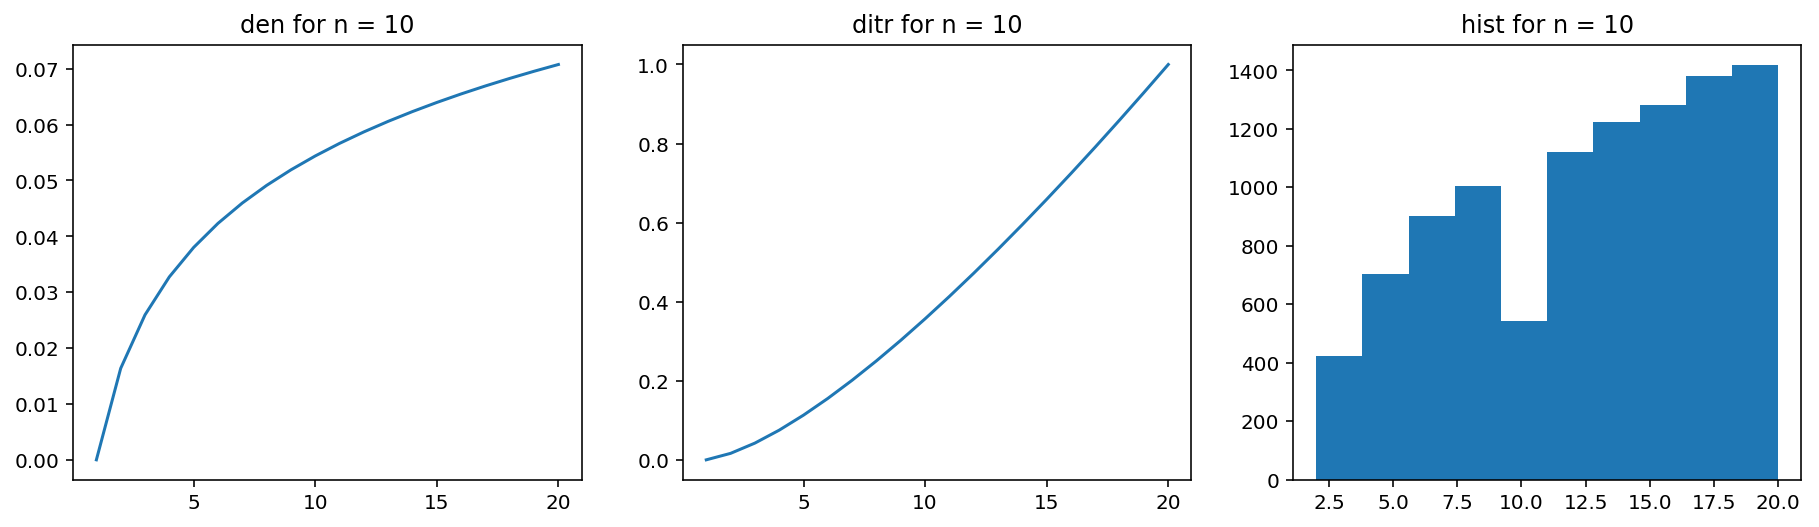

In [2]:
# Місце для Вашого коду

import matplotlib.pyplot as plt

n = 10
test_ = np.arange(1, 2*n + 1)

plt.subplots_adjust(left=2, right=4)
plt.subplot(1, 3, 1, title=f'den for n = {n}')
plt.plot(test_, randint1.pmf(test_))
plt.subplot(1, 3, 2, title=f'ditr for n = {n}')
plt.plot(test_, randint1.cdf(test_))
plt.subplot(1, 3, 3, title=f'hist for n = {n}')
plt.hist(randint1.rvs(size = 10000))
plt.show()


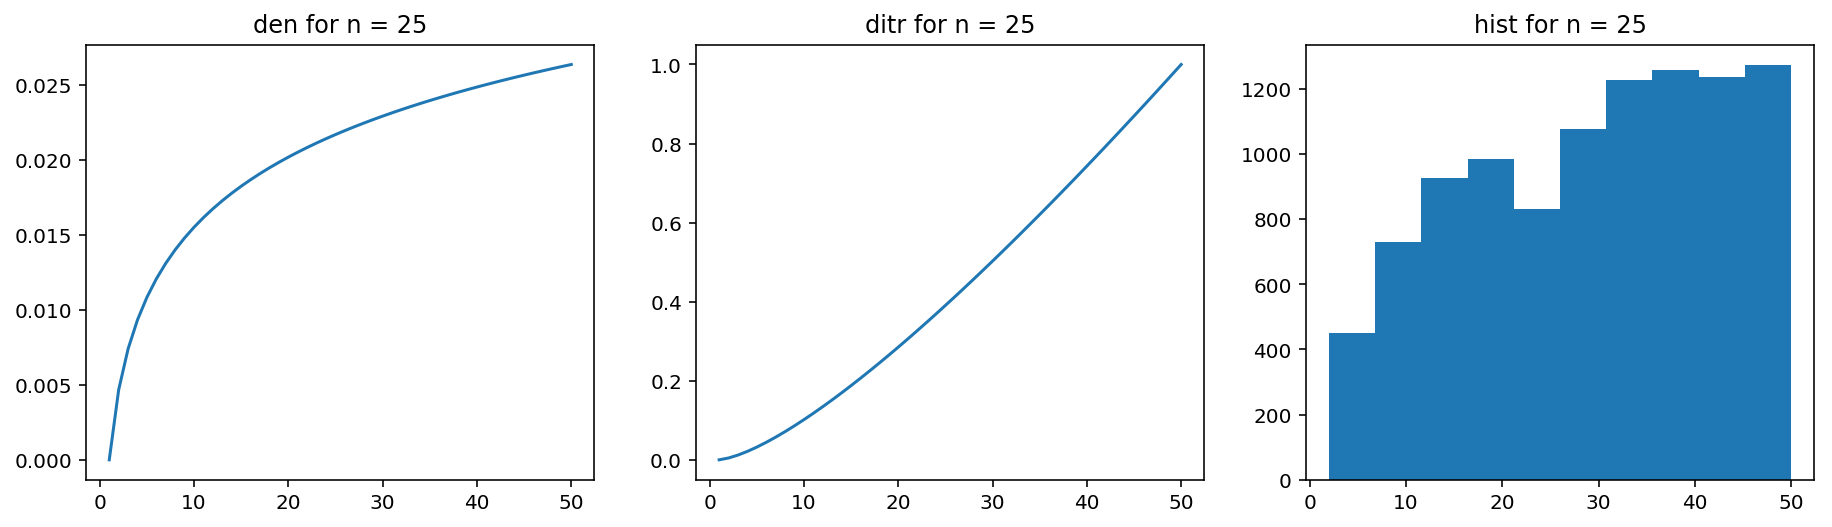

In [4]:
k = 25
test_2 = np.arange(1, 2*k + 1)
# it sets the padding of each subplot
plt.subplots_adjust(left=2, right=4)

plt.subplot(1, 3, 1, title=f'den for n = {k}')
plt.plot(test_2, randint2.pmf(test_2))
plt.subplot(1, 3, 2, title=f'ditr for n = {k}')
plt.plot(test_2, randint2.cdf(test_2))
plt.subplot(1, 3, 3, title=f'hist for n = {k}')
plt.hist(randint2.rvs(size=10000))
plt.show()

### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [12]:
# Місце для Вашого коду

for i, rand in [(10, randint1), (25, randint2)]:
    tmp_odd = np.arange(1, 2 * i + 1, 2)
    tmp_even = np.arange(2, 2 * i + 1, 2)
    print(f"n = {i} \n for odd:{sum(rand.pmf(tmp_odd))}, for even :{sum(rand.pmf(tmp_even))}")


n = 10 
 for odd:0.47949537007207715, for even :0.5205046299279227
n = 25 
 for odd:0.49263592601410955, for even :0.5073640739858903


### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [14]:
# Місце для Вашого коду

from collections import Counter

# This is the answer to the question in the title (for odd and even number)

for i, rand in [(10, randint1), (25, randint2)]:
    tmp_odd = np.arange(1, 2 * i + 1, 2)
    tmp_even = np.arange(2, 2 * i + 1, 2)

    exper = Counter(rand.rvs(size = 1000000))
    res_odd = sum([exper[el] for el in tmp_odd])
    res_even = sum([exper[el] for el in tmp_even])
    print(f'n = {i} \n for odd:{res_odd / 1000000}, for even :{res_even / 1000000}')


n = 10 
 for odd:0.47982, for even :0.52018


n = 25 
 for odd:0.492873, for even :0.507127
